In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix , classification_report
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from matplotlib.colors import ListedColormap

In [2]:
datas = datasets.load_breast_cancer()
data = pd.DataFrame(np.c_[datas['data'] ,datas['target']], columns =np.append( datas['feature_names'] ,['target']))
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


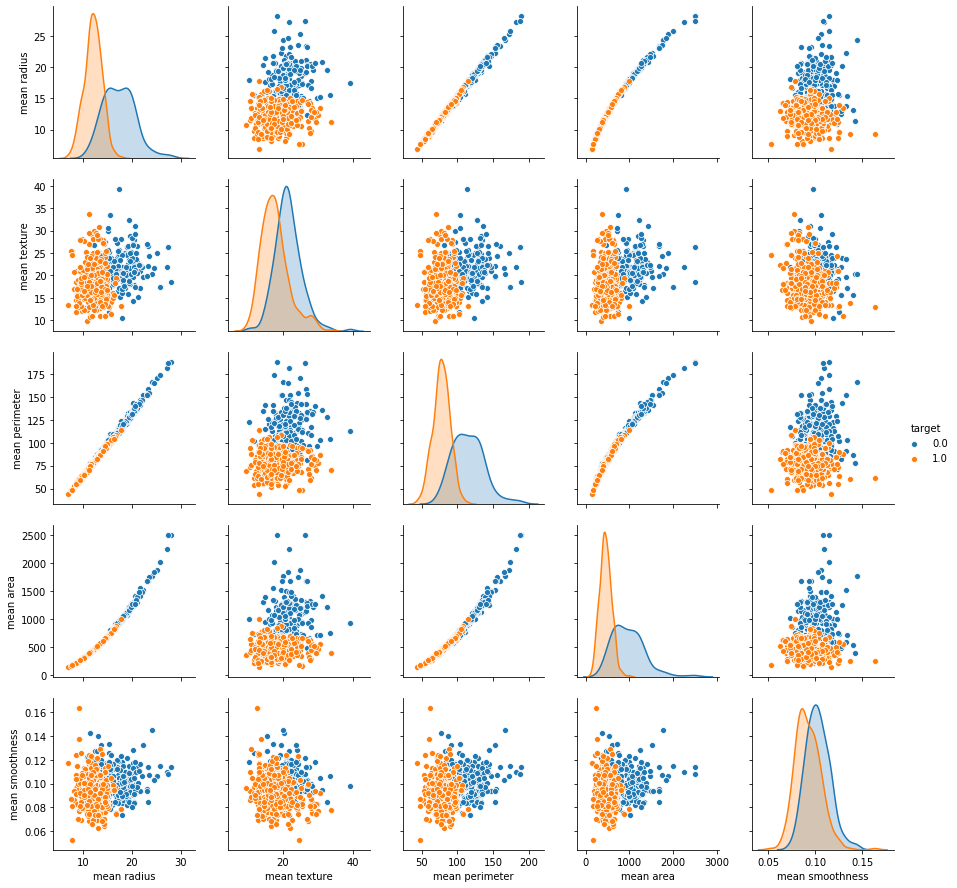

In [3]:
sns.pairplot(data , hue='target', vars = ['mean radius' , 'mean texture' , 'mean perimeter' , 'mean area', 'mean smoothness'])


In [4]:
X_train , X_test , y_train , y_test = train_test_split(datas.data[:,:2],datas.target ,test_size = 0.3 , random_state =77)
model = svm.SVC(kernel = 'linear')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

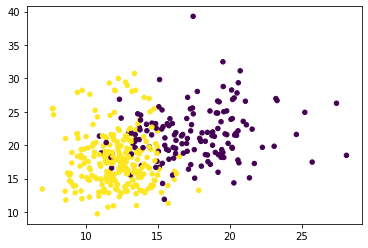

In [5]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20 , )
plt.show()

In [6]:
pred = model.predict(X_test)

In [7]:
print("Accuracy:" , metrics.accuracy_score(y_test , pred))
print("Precision:" , metrics.precision_score(y_test,pred))
print("Recall:", metrics.recall_score(y_test,pred))

Accuracy: 0.9122807017543859
Precision: 0.8983050847457628
Recall: 0.9724770642201835


              precision    recall  f1-score   support

           0       0.94      0.81      0.87        62
           1       0.90      0.97      0.93       109

    accuracy                           0.91       171
   macro avg       0.92      0.89      0.90       171
weighted avg       0.91      0.91      0.91       171



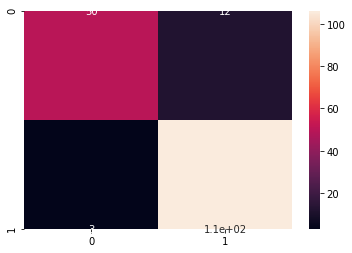

In [9]:
cm = np.array(confusion_matrix(y_test,pred , labels = [0,1]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
# print(confusion)
c,
# sns.heatmap(cm ,annot=True)
print(classification_report(y_test, pred))
plt.show()

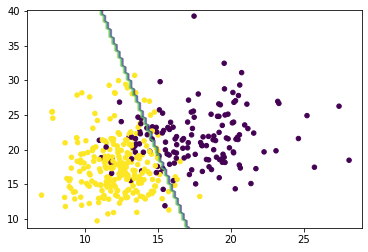

In [13]:
h=0.2 # Step size in the mesh
x1_min = X_train[:,0].min() - 1
x1_max = X_train[:,0].max() + 1
x2_min = X_train[:,1].min() - 1
x2_max = X_train[:,1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,h),
                           np.arange(x2_min,x2_max,h))
    
Z = model.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
#markers = ('s','x','o','^','v')
#colors = ('red','blue','lightgreen','gray','cyan')
#color_Map = ListedColormap(colors[:len(np.unique(y_train))])
plt.scatter(X_train[:,0] , X_train[:,1] , c=y_train, s=20)
plt.contour(xx1,xx2,Z,alpha=0.4,) 
#plt.xlim(xx1.min(),xx1.max())
#plt.ylim(xx2.min(),xx2.max())

In [12]:
Xpred.shape

NameError: name 'Xpred' is not defined